In [117]:
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
np.random.seed(0)
torch.manual_seed(0)

In [215]:
# Activations
# - Relu
# - Tanh
# - Identity

def activation(x, function):
    x = torch.tensor(x, dtype=torch.float32)
    
    if function == "relu":
        output = F.relu(x)
    
    elif function == "tanh":
        output = F.tanh(x) 
    
    elif function == "linear": 
        output = x
    else:
        raise ValueError("Unsupported activation function")
    return output.numpy()

In [177]:
A = np.array([[1.25, .75], [.75, 1.25]])
B = np.array([[1.25, .75], [.75, 1.25]])

In [178]:
def f_(x, A=A):
    return A@x+ 0
def g_(x, B=B):
    return B@x+ 0

def rnn(x_t, function_name, A=A, B=B):
    f_x = f_(x_t, A)
    x_t_1 = activation(f_x, function_name) 
    y_t = g_(x_t_1, B) 
    return x_t_1, y_t

In [184]:
# sample 10 points from a 2D standard normal distribution
x = np.random.randn(10,2)
x

array([[-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,  0.3024719 ],
       [-0.63432209, -0.36274117],
       [-0.67246045, -0.35955316],
       [-0.81314628, -1.7262826 ],
       [ 0.17742614, -0.40178094],
       [-1.63019835,  0.46278226],
       [-0.90729836,  0.0519454 ]])

In [210]:

def get_norm_y(x, function_name, n=15):
    norm_y_list = []
    for i in range(n):
        x, y = rnn(x, function_name, A, B)
        y_norm = np.linalg.norm(y)
        norm_y_list.append(y_norm)
    return norm_y_list


def plot_norms(x, function, name):
    for i in range(10):
        element = x[i,:]
        norm_y_list = get_norm_y(element, function)
        x_list = [i for i in range(1, len(norm_y_list)+1)]
        plt.plot(x_list, norm_y_list, label=f"{i+1}th sample")
    plt.title(f"Norm of y for {name} Activation")
    plt.xlabel("t")
    plt.ylabel(r"$||y_t||_2$")
    plt.legend(title="Samples")
    plt.savefig(f"1_norm_y_{name}.png")
    plt.show()


def plot_norm_2(x, function, name):
    for i in range(2):
        element = x[:, i]
        norm_y_list = get_norm_y(element, function)
        x_list = [i for i in range(1, len(norm_y_list)+1)]
        plt.plot(x_list, norm_y_list, label = f'x{i}')
        plt.title(f"Norm of y for {name} Activation")
        plt.xlabel("t")
        plt.ylabel(r"$||y_t||_2$")
        plt.legend(title="Samples")
    plt.savefig(f"2_norm_y_{name}.png")
    plt.show()


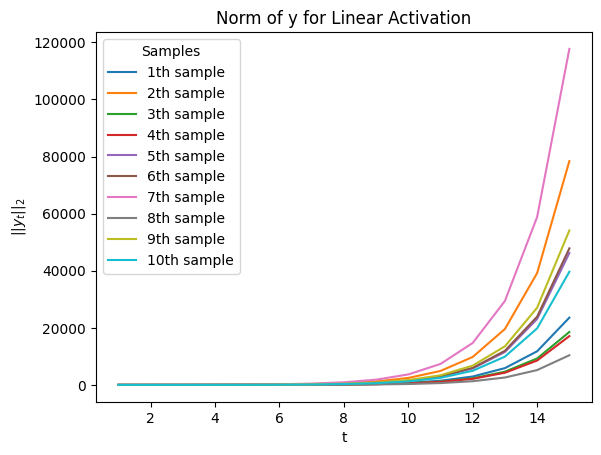

In [211]:
plot_norms(x, 'linear', "Linear")

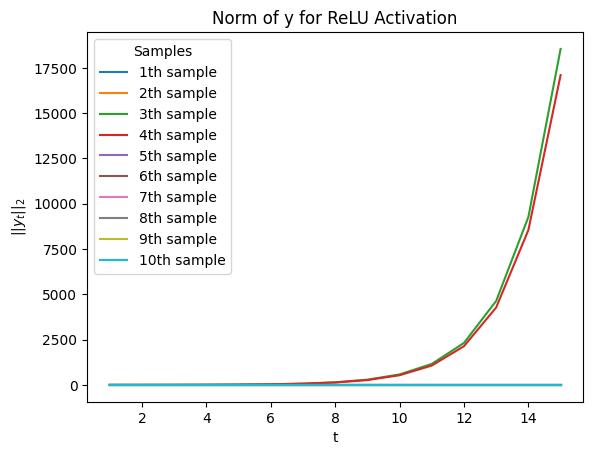

In [212]:
plot_norms(x,'relu', "ReLU")

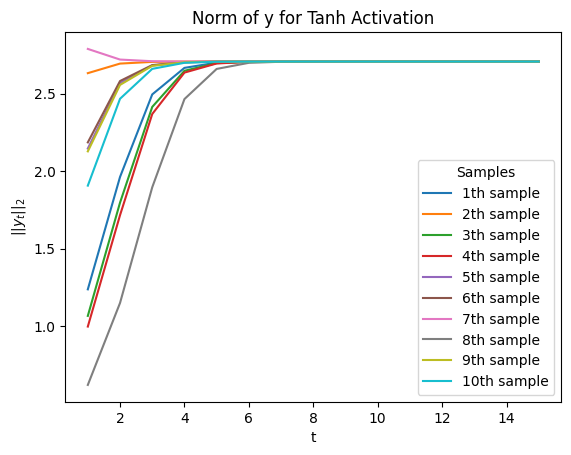

In [213]:
plot_norms(x, 'tanh', "Tanh")

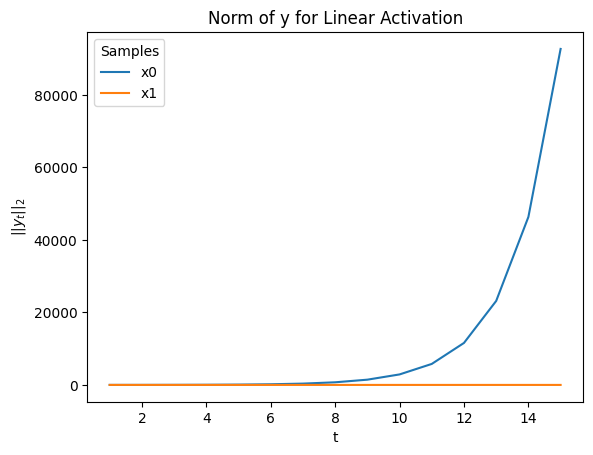

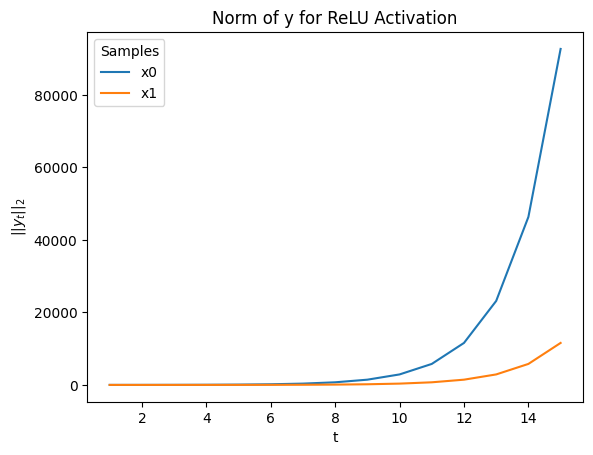

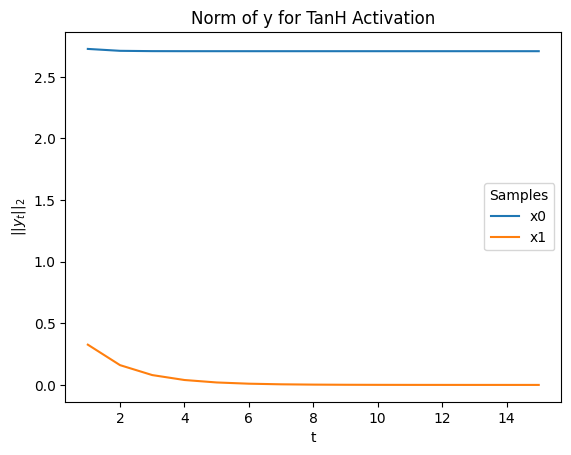

In [214]:
# plot_norm_2(x = np.array([1,1]), function = 'linear', name = 'Linear')
# plot_norm_2(x = np.array([1,-1]), function = 'linear', name = 'Linear')

plot_norm_2(x = np.array([[1,1], [1,-1]]), function = 'linear', name = 'Linear')

plot_norm_2(x = np.array([[1,1], [1,-1]]), function = 'relu', name = 'ReLU')

plot_norm_2(x = np.array([[1,1], [1,-1]]), function = 'tanh', name = 'TanH')